Para realizar el Análisis de Datos, seguiré los siguientes pasos para explorar el archivo "heart_disease_dataset.csv" utilizando Python:

**1. Importar Librerías Necesarias:**

Primero, importo las librerías esenciales para el análisis de datos:
   - **pandas**: para la manipulación y análisis de datos, permitiéndome leer archivos y crear DataFrames.
   - **numpy**: para realizar operaciones numéricas eficientes.
   - **matplotlib** y **seaborn**: para generar visualizaciones informativas que faciliten la interpretación de los datos.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

**2. Cargar los Datos en un DataFrame:**

Uso `pd.read_csv()` de pandas para leer el archivo CSV y cargarlo en un DataFrame, permitiéndome manejar los datos en formato tabular. Si el archivo fuera un PDF, requeriría una librería adicional como PyPDF2 para convertirlo en un formato compatible.

**3. Inspección Inicial de los Datos:**

Para obtener una visión general del conjunto de datos:
   - `data.head()`: visualizo las primeras filas para entender el formato de los datos y los nombres de las columnas.
   - `data.tail()`: reviso las últimas filas para obtener más contexto.
   - `data.info()`: analizo el tipo de datos en cada columna y verifico si existen valores faltantes.
   - `data.describe()`: obtengo estadísticas descriptivas de las columnas numéricas para comprender la distribución de los datos.
   - `data.shape`: verifico el tamaño del conjunto de datos (filas y columnas).

**4. Limpieza de Datos:**

   - **Manejo de Valores Faltantes**: Si detecto valores faltantes en `data.info()`, los abordo según el contexto:
      - **Eliminación de filas**: si hay pocos valores faltantes, uso `data.dropna()`.
      - **Imputación**: si son muchos, puedo imputar valores usando la media o mediana (`data.fillna(data.mean())` o `data.fillna(data.median())`).
   - **Conversión de Tipos de Datos**: Me aseguro de que cada variable esté en el tipo de datos adecuado, convirtiendo variables categóricas a tipo `category` si es necesario.

**5. Análisis Exploratorio de Datos (EDA):**

   - **Análisis Univariado**: Examino variables individualmente:
      - **Histogramas**: visualizo la distribución de variables numéricas con `plt.hist(data['columna'])` o `sns.histplot(data['columna'])`.
      - **Diagramas de Barras**: reviso la frecuencia de variables categóricas usando `sns.countplot(data['columna'])`.
      - **Medidas de Tendencia Central y Dispersión**: calculo la media, mediana y desviación estándar para entender mejor cada variable.
   - **Análisis Bivariado**: Exploro relaciones entre pares de variables:
      - **Diagramas de Dispersión**: con `sns.scatterplot(x='columna1', y='columna2', data=data)` identifico patrones y tendencias.
      - **Tablas de Contingencia**: utilizo `pd.crosstab(data['columna1'], data['columna2'])` para analizar la relación entre dos variables categóricas.
      - **Pruebas de Hipótesis**: si observo una posible relación, aplico pruebas estadísticas para evaluar su significancia.
   - **Análisis Multivariado**: examino relaciones entre múltiples variables:
      - **Matrices de Correlación**: visualizo correlaciones entre variables numéricas usando `sns.heatmap(data.corr(), annot=True)`.
      - **Análisis de Componentes Principales (PCA)**: si tengo muchas variables, uso PCA para reducir la dimensionalidad y descubrir patrones importantes.

**6. Visualización de Datos:**

Creo visualizaciones a lo largo del EDA para facilitar la comprensión y comunicación de los hallazgos, cuidando el uso de títulos, etiquetas y leyendas para hacerlas claras y precisas. Este paso lo haré en cada punto ya que quedara más ordenado y correlativo al punto desarrollado.

**7. Documentación:**

Documentaré cada paso del proceso de EDA, detallando decisiones como el tratamiento de valores faltantes y transformaciones aplicadas, lo que garantiza la reproducibilidad y facilita la comunicación de resultados.

Este enfoque me permitirá realizar un EDA completo y bien fundamentado del conjunto de datos.

**1. Importar Librerías:**

*   Comenzar importando las librerías de Python esenciales para el análisis y la visualización de datos.
*   Las librerías clave serían:
    *   **pandas:** para manipular y analizar datos.
    *   **numpy:** para operaciones numéricas.
    *   **matplotlib** y **seaborn:** para la visualización de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oliverquiros/enfermedades-del-corazon")

print("Path to dataset files:", path)

100%|██████████| 9.55k/9.55k [00:00<00:00, 11.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/oliverquiros/enfermedades-del-corazon/versions/1


In [3]:
base_dir = '/root/.cache/kagglehub/datasets/oliverquiros/enfermedades-del-corazon/versions/1'

# Find the CSV file within the directory (assuming there's only one CSV file)
for filename in os.listdir(base_dir):
    if filename.endswith('.csv'):
        csv_file = os.path.join(base_dir, filename)
        break  # Stop searching after finding the first CSV file

# Read the CSV file using pandas
data = pd.read_csv(csv_file)
data.to_csv('heart_disease_dataset.csv', index=False)

**2.  Cargar los Datos en un DataFrame:**
*   **Leer el archivo:** Utiliza la función `pd.read_csv()` de pandas (si el archivo es un CSV) o una función apropiada para el formato específico del archivo.

In [4]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# **Traducción de los nombres de las columnas**

In [5]:
columnas_traducidas = {
    "age": "Edad",
    "sex": "Sexo",
    "chest pain type": "Tipo de dolor en el pecho",
    "resting bp s": "Presión arterial en reposo",
    "cholesterol": "Colesterol",
    "fasting blood sugar": "Azúcar en la sangre en ayunas",
    "resting ecg": "Electrocardiograma en reposo",
    "max heart rate": "Frecuencia cardíaca máxima",
    "exercise angina": "Angina inducida por el ejercicio",
    "oldpeak": "Depresión del ST",
    "ST slope": "Pendiente del ST",
    "target": "Objetivo"
}
data.rename(columns=columnas_traducidas, inplace=True)

In [6]:
data

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


**3. Inspección Inicial de los Datos:**

*   Obtén una comprensión inicial del DataFrame usando:
    *   `data.head()`: Muestra las primeras filas, dando una idea del formato de los datos y los nombres de las columnas.
    *   `data.tail()`: Muestra las últimas filas.
    *   `data.info()`: Ofrece información sobre el tipo de datos de cada columna (por ejemplo, entero, flotante, objeto) y si hay valores faltantes. Esta información es crucial para determinar qué pasos de limpieza o transformación de datos podrían ser necesarios.
    *   `data.describe()`: Genera estadísticas descriptivas para las columnas numéricas, como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles. Esto te ayuda a comprender la distribución de los datos numéricos en el conjunto de datos.
    *   `data.shape`: Indica las dimensiones del conjunto de datos (número de filas y columnas), proporcionando una vista general del tamaño del conjunto de datos.

In [7]:
data.head()

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
data.tail()

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              1190 non-null   int64  
 1   Sexo                              1190 non-null   int64  
 2   Tipo de dolor en el pecho         1190 non-null   int64  
 3   Presión arterial en reposo        1190 non-null   int64  
 4   Colesterol                        1190 non-null   int64  
 5   Azúcar en la sangre en ayunas     1190 non-null   int64  
 6   Electrocardiograma en reposo      1190 non-null   int64  
 7   Frecuencia cardíaca máxima        1190 non-null   int64  
 8   Angina inducida por el ejercicio  1190 non-null   int64  
 9   Depresión del ST                  1190 non-null   float64
 10  Pendiente del ST                  1190 non-null   int64  
 11  Objetivo                          1190 non-null   int64  
dtypes: flo

In [10]:
data_descriptiva = data.describe().round(2)
data_descriptiva

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
count,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00,1190.00
mean,53.72,0.76,3.23,132.15,210.36,0.21,0.70,139.73,0.39,0.92,1.62,0.53
std,9.36,0.42,0.94,18.37,101.42,0.41,0.87,25.52,0.49,1.09,0.61,0.50
min,28.00,0.00,1.00,0.00,0.00,0.00,0.00,60.00,0.00,-2.60,0.00,0.00
25%,47.00,1.00,3.00,120.00,188.00,0.00,0.00,121.00,0.00,0.00,1.00,0.00
50%,54.00,1.00,4.00,130.00,229.00,0.00,0.00,140.50,0.00,0.60,2.00,1.00
75%,60.00,1.00,4.00,140.00,269.75,0.00,2.00,160.00,1.00,1.60,2.00,1.00
max,77.00,1.00,4.00,200.00,603.00,1.00,2.00,202.00,1.00,6.20,3.00,1.00


In [11]:
data.shape

(1190, 12)

**4. Limpieza de Datos:**

*   **Manejar Valores Faltantes:** Si `data.info()` revela valores faltantes, decide cómo abordarlos:
    *   **Eliminar filas:** Si hay pocas filas con valores faltantes y eliminarlas no afectará significativamente el análisis, puedes usar `data.dropna()`.
    *   **Imputar valores:** Si hay una cantidad significativa de valores faltantes, puedes imputarlos utilizando la media, la mediana (`data.fillna(data.mean())` o `data.fillna(data.median())`) o métodos más avanzados como la imputación por KNN o algoritmos basados en modelos. La elección del método dependerá del contexto y la naturaleza de los datos faltantes.
*   **Convertir Tipos de Datos:**  Asegúrate de que las variables estén en el tipo de datos correcto para el análisis. Por ejemplo, si una variable categórica está codificada como números, conviértela a tipo de datos de cadena o categórica usando `data['columna'] = data['columna'].astype('category')`.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Edad                              1190 non-null   int64  
 1   Sexo                              1190 non-null   int64  
 2   Tipo de dolor en el pecho         1190 non-null   int64  
 3   Presión arterial en reposo        1190 non-null   int64  
 4   Colesterol                        1190 non-null   int64  
 5   Azúcar en la sangre en ayunas     1190 non-null   int64  
 6   Electrocardiograma en reposo      1190 non-null   int64  
 7   Frecuencia cardíaca máxima        1190 non-null   int64  
 8   Angina inducida por el ejercicio  1190 non-null   int64  
 9   Depresión del ST                  1190 non-null   float64
 10  Pendiente del ST                  1190 non-null   int64  
 11  Objetivo                          1190 non-null   int64  
dtypes: flo

In [13]:
data_faltante = data.isnull().sum()
data_faltante

,0
Edad,0
Sexo,0
Tipo de dolor en el pecho,0
Presión arterial en reposo,0
Colesterol,0
Azúcar en la sangre en ayunas,0
Electrocardiograma en reposo,0
Frecuencia cardíaca máxima,0
Angina inducida por el ejercicio,0
Depresión del ST,0


In [14]:
data.sample(2)

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
584,69,1,3,142,271,0,2,126,0,0.3,1,0
150,39,1,2,130,215,0,0,120,0,0.0,1,0


In [15]:
data2 = data.copy()

In [16]:
data2

,Edad,Sexo,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [17]:
data2['Sexo_descriptivar'] = data['Sexo'].map({0: 'Femenino', 1: 'Masculino'})
data2.insert(data2.columns.get_loc('Sexo') - 1, 'Sexo_descriptivar', data2.pop('Sexo_descriptivar'))
data2.insert(data2.columns.get_loc('Sexo_descriptivar') + 1, 'Sexo', data2.pop('Sexo'))
data2

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
0,Masculino,1,40,2,140,289,0,0,172,0,0.0,1,0
1,Femenino,0,49,3,160,180,0,0,156,0,1.0,2,1
2,Masculino,1,37,2,130,283,0,1,98,0,0.0,1,0
3,Femenino,0,48,4,138,214,0,0,108,1,1.5,2,1
4,Masculino,1,54,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,Masculino,1,45,1,110,264,0,0,132,0,1.2,2,1
1186,Masculino,1,68,4,144,193,1,0,141,0,3.4,2,1
1187,Masculino,1,57,4,130,131,0,0,115,1,1.2,2,1
1188,Femenino,0,57,2,130,236,0,2,174,0,0.0,2,1


**5. Análisis Exploratorio de Datos (EDA):**

*   **Análisis Univariado:** Explora variables individualmente:
    *   **Histogramas:** Visualiza la distribución de variables numéricas usando `plt.hist(data['columna'])` de matplotlib o `sns.histplot(data['columna'])` de seaborn. Esto te ayuda a identificar la forma de la distribución, valores atípicos y sesgos.
    *   **Diagramas de Barras:** Visualiza la frecuencia de variables categóricas usando `sns.countplot(data['columna'])`. Esto muestra las categorías y cuántas veces aparece cada una en el conjunto de datos.
    *   **Medidas de Tendencia Central y Dispersión:** Calcula la media, la mediana, la desviación estándar, etc., para cada variable usando `data['columna'].mean()`, `data['columna'].median()`, `data['columna'].std()`. Esto resume numéricamente la distribución de la variable.
*   **Análisis Bivariado:** Explora las relaciones entre pares de variables:
    *   **Diagramas de Dispersión:** Visualiza la relación entre dos variables numéricas usando `sns.scatterplot(x='columna1', y='columna2', data=data)`. Busca patrones, tendencias, valores atípicos y relaciones lineales o no lineales.
    *   **Tablas de Contingencia:** Analiza la relación entre dos variables categóricas creando una tabla de contingencia usando `pd.crosstab(data['columna1'], data['columna2'])`. Esto muestra la frecuencia de cada combinación de categorías de las dos variables.
    *   **Pruebas de Hipótesis:** Si sospechas una relación entre variables, puedes realizar pruebas de hipótesis estadísticas (como una prueba t o una prueba de chi-cuadrado) para evaluar la significancia estadística de la relación observada. *La elección de la prueba dependerá de los tipos de variables y la hipótesis que se esté probando.*
*   **Análisis Multivariado:** Explora las relaciones entre múltiples variables:
    *   **Matrices de Correlación:** Visualiza la correlación entre múltiples variables numéricas usando `sns.heatmap(data.corr(), annot=True)`. Esto muestra la fuerza y la dirección de las relaciones lineales entre pares de variables.
    *   **Análisis de Componentes Principales (PCA):** Si tienes muchas variables, puedes usar PCA para reducir la dimensionalidad al encontrar combinaciones lineales de variables (componentes principales) que capturan la mayor varianza en los datos. Esto puede ayudar a simplificar el análisis y revelar patrones ocultos.

*   **Histogramas:** Visualiza la distribución de variables numéricas usando `plt.hist(data['columna'])` de matplotlib o `sns.histplot(data['columna'])` de seaborn. Esto te ayuda a identificar la forma de la distribución, valores atípicos y sesgos.

In [18]:
data2.sample()

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
1113,Masculino,1,47,4,112,204,0,0,143,0,0.1,1,0


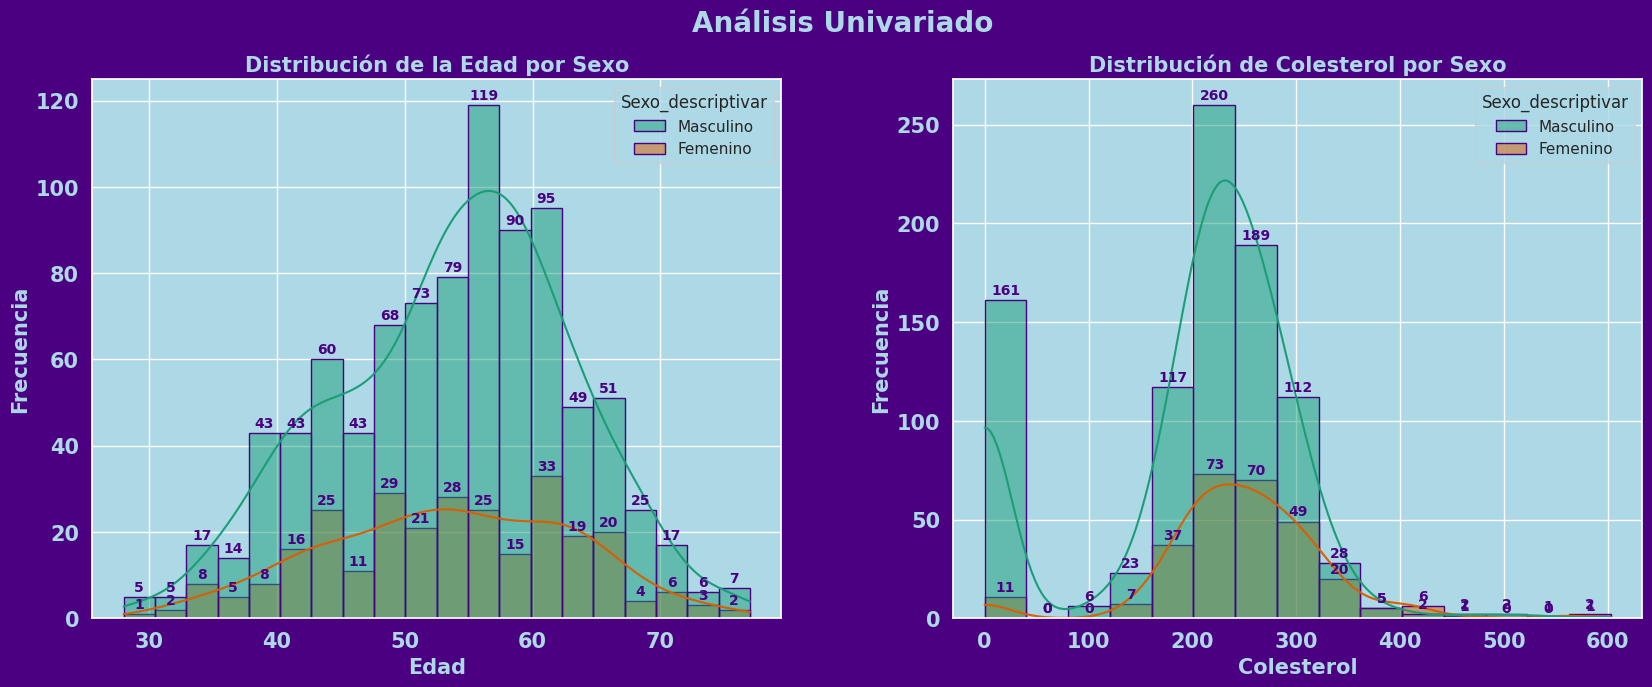

In [19]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Univariado', color='lightblue', size=20, weight='bold')
plt.subplot(1,2,1)
ax = sns.histplot(data2,x='Edad', kde=True, hue='Sexo_descriptivar', palette='Dark2', edgecolor='indigo')
plt.title('Distribución de la Edad por Sexo', color='lightblue', size=15, weight='bold')
plt.xlabel('Edad', color='lightblue', size=15,weight='bold')
plt.ylabel('Frecuencia', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
for container in ax.containers:
        ax.bar_label(
                    container,
                    label_type='edge',
                    padding=2,
                    fontsize=10,
                    fontweight='bold',
                    color='indigo'
        )
plt.subplot(1,2,2)
ax = sns.histplot(data2,x='Colesterol', kde=True, hue='Sexo_descriptivar', palette='Dark2', edgecolor='indigo',bins=15)
plt.title('Distribución de Colesterol por Sexo', color='lightblue', size=15, weight='bold')
plt.xlabel('Colesterol', color='lightblue', size=15,weight='bold')
plt.ylabel('Frecuencia', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
for container in ax.containers:
        ax.bar_label(
                    container,
                    label_type='edge',
                    padding=2,
                    fontsize=10,
                    fontweight='bold',
                    color='indigo'
        )
plt.subplots_adjust(wspace=0.25)
plt.show()

In [20]:
presion_arterial_en_reposo = 80
presion_arterial_en_reposo2 = 120

In [21]:
data2_grupo_p_a_r = data2.groupby((data2['Presión arterial en reposo'] > presion_arterial_en_reposo) & (data2['Presión arterial en reposo'] <= presion_arterial_en_reposo2))
data2_grupo_p_a_r = data2_grupo_p_a_r.get_group(True)
data2_grupo_p_a_r

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
5,Masculino,1,39,3,120,339,0,0,170,0,0.0,1,0
7,Masculino,1,54,2,110,208,0,0,142,0,0.0,1,0
9,Femenino,0,48,2,120,284,0,0,120,0,0.0,1,0
12,Masculino,1,39,2,120,204,0,0,145,0,0.0,1,0
14,Femenino,0,42,3,115,211,0,1,137,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,Masculino,1,58,4,114,318,0,1,140,0,4.4,3,1
1176,Masculino,1,56,2,120,240,0,0,169,0,0.0,3,0
1179,Masculino,1,44,4,120,169,0,0,144,1,2.8,3,1
1182,Masculino,1,41,2,120,157,0,0,182,0,0.0,1,0


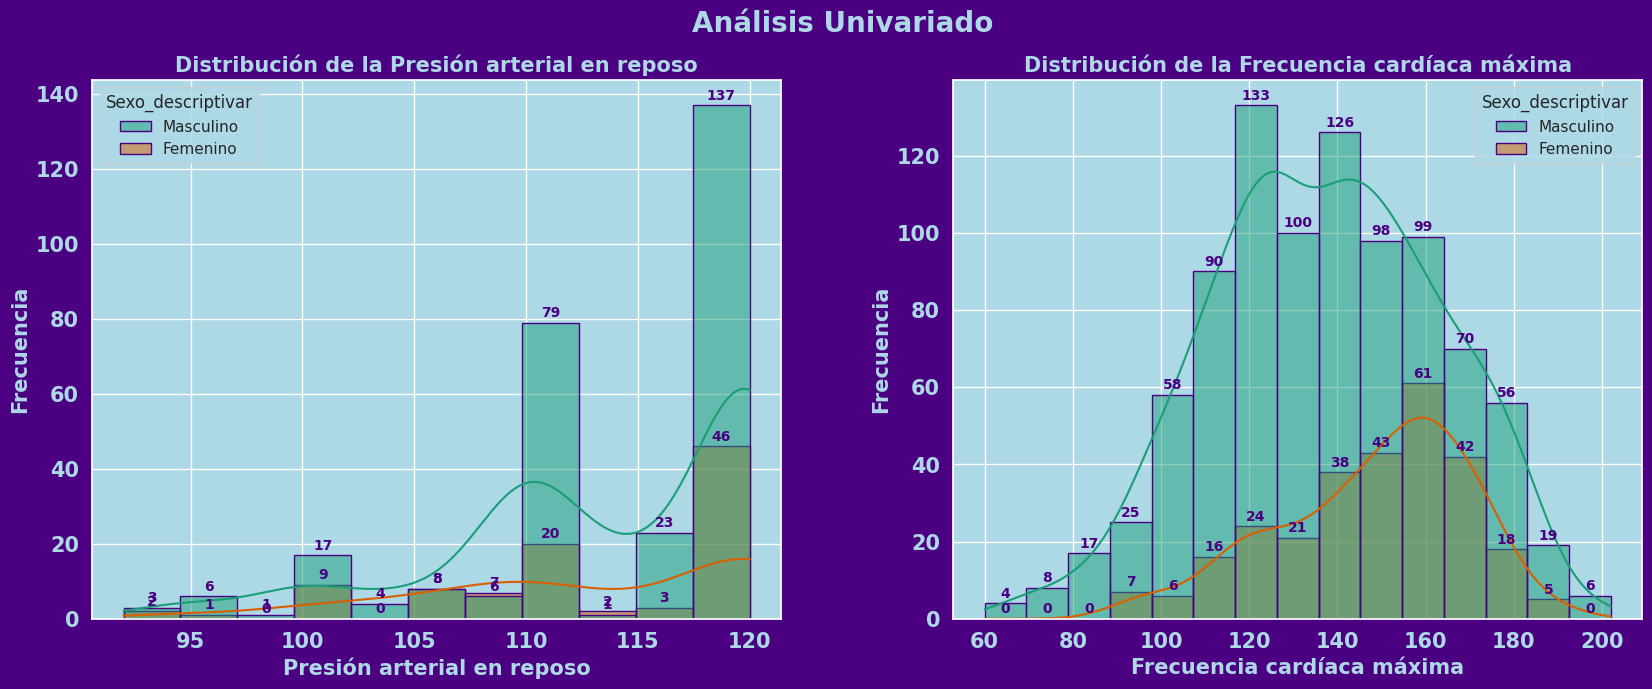

In [22]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Univariado', color='lightblue', size=20, weight='bold')
plt.subplot(1,2,1)
# Instead of passing data2_grupo_p_a_r to the x argument,
# pass the column name 'Presión arterial en reposo' and filter the data within the histplot function.
ax = sns.histplot(data=data2_grupo_p_a_r, x='Presión arterial en reposo',
                  kde=True, hue='Sexo_descriptivar', palette='Dark2', edgecolor='indigo')
plt.title('Distribución de la Presión arterial en reposo', color='lightblue', size=15, weight='bold')
plt.xlabel('Presión arterial en reposo', color='lightblue', size=15,weight='bold')
plt.ylabel('Frecuencia', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
for container in ax.containers:
        ax.bar_label(
                    container,
                    label_type='edge',
                    padding=2,
                    fontsize=10,
                    fontweight='bold',
                    color='indigo'
        )
plt.subplot(1,2,2)
ax = sns.histplot(data2,x='Frecuencia cardíaca máxima', kde=True, hue='Sexo_descriptivar', palette='Dark2', edgecolor='indigo',bins=15)
plt.title('Distribución de la Frecuencia cardíaca máxima', color='lightblue', size=15, weight='bold')
plt.xlabel('Frecuencia cardíaca máxima', color='lightblue', size=15,weight='bold')
plt.ylabel('Frecuencia', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
for container in ax.containers:
        ax.bar_label(
                    container,
                    label_type='edge',
                    padding=2,
                    fontsize=10,
                    fontweight='bold',
                    color='indigo'
        )
plt.subplots_adjust(wspace=0.25)
plt.show()

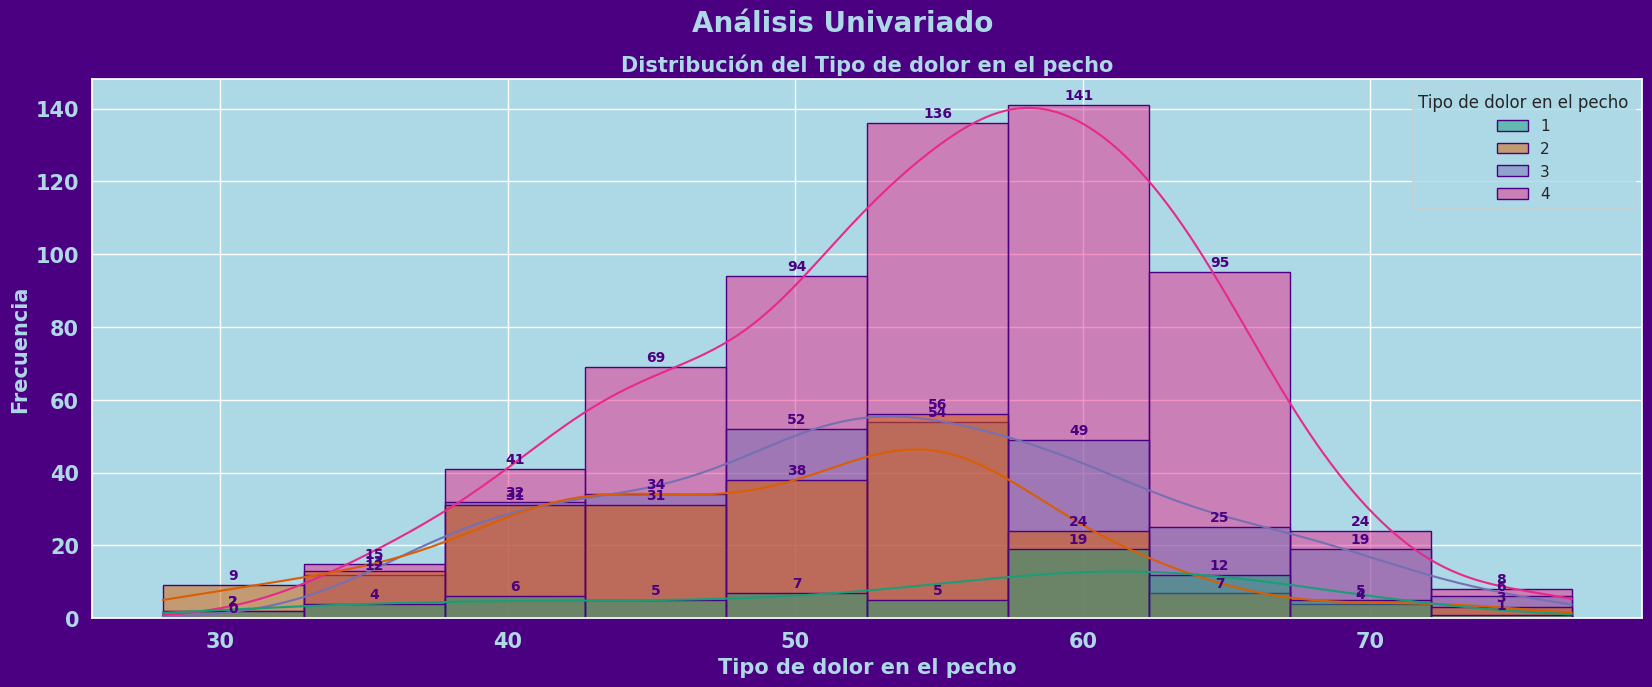

In [23]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Univariado', color='lightblue', size=20, weight='bold')
ax = sns.histplot(data2,hue='Tipo de dolor en el pecho', kde=True, x='Edad', palette='Dark2', edgecolor='indigo', bins=10)
plt.title('Distribución del Tipo de dolor en el pecho', color='lightblue', size=15, weight='bold')
plt.xlabel('Tipo de dolor en el pecho', color='lightblue', size=15,weight='bold')
plt.ylabel('Frecuencia', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
for container in ax.containers:
        ax.bar_label(
                    container,
                    label_type='edge',
                    padding=2,
                    fontsize=10,
                    fontweight='bold',
                    color='indigo'
        )
plt.show()

*   **Análisis Bivariado:** Explora las relaciones entre pares de variables:
    *   **Diagramas de Dispersión:** Visualiza la relación entre dos variables numéricas usando `sns.scatterplot(x='columna1', y='columna2', data=data)`. Busca patrones, tendencias, valores atípicos y relaciones lineales o no lineales.
    *   **Tablas de Contingencia:** Analiza la relación entre dos variables categóricas creando una tabla de contingencia usando `pd.crosstab(data['columna1'], data['columna2'])`. Esto muestra la frecuencia de cada combinación de categorías de las dos variables.
    *   **Pruebas de Hipótesis:** Si sospechas una relación entre variables, puedes realizar pruebas de hipótesis estadísticas (como una prueba t o una prueba de chi-cuadrado) para evaluar la significancia estadística de la relación observada. *La elección de la prueba dependerá de los tipos de variables y la hipótesis que se esté probando.*

In [24]:
data2.sample()

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
1143,Femenino,0,67,4,106,223,0,0,142,0,0.3,1,0


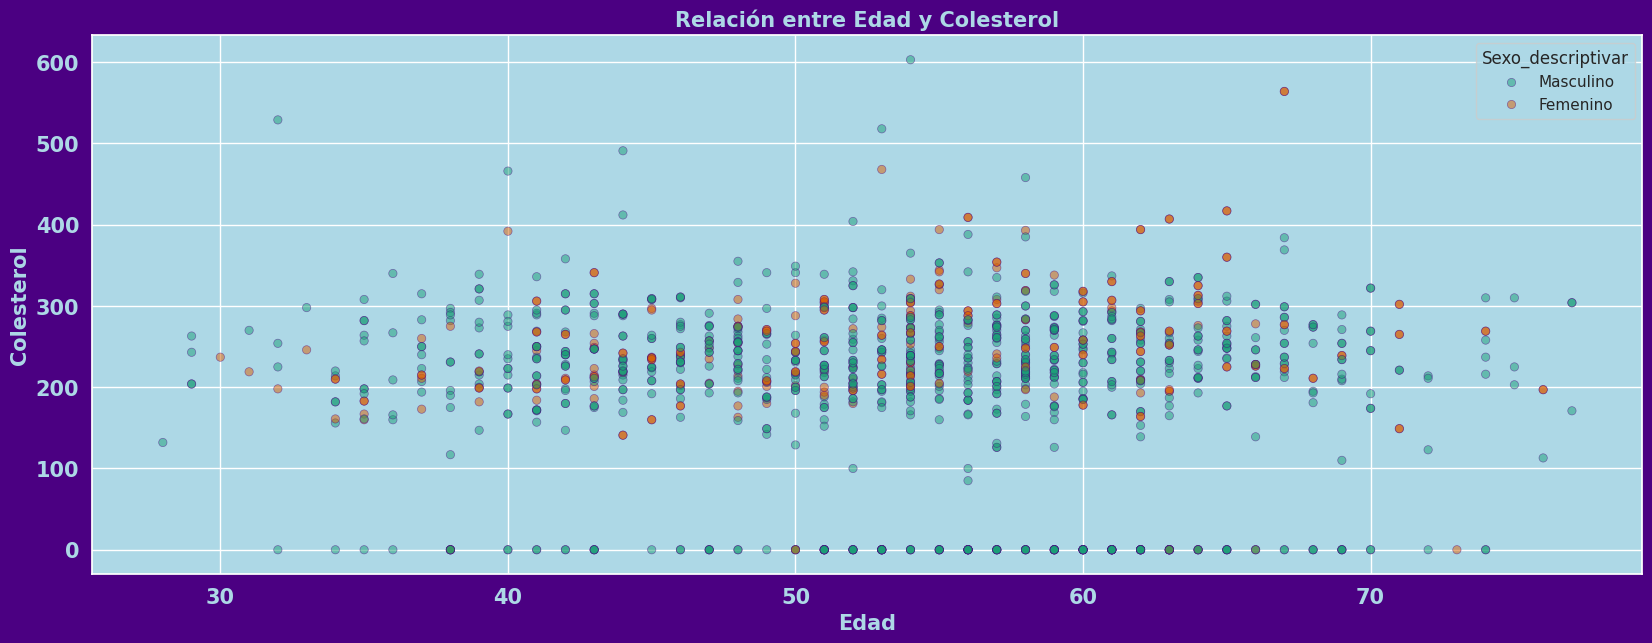

In [25]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
sns.scatterplot(data=data2, x='Edad', y='Colesterol', hue='Sexo_descriptivar', palette='Dark2', edgecolor='indigo',alpha = 0.5)
plt.title('Relación entre Edad y Colesterol', color='lightblue', size=15, weight='bold')
plt.xlabel('Edad', color='lightblue', size=15,weight='bold')
plt.ylabel('Colesterol', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
plt.show()

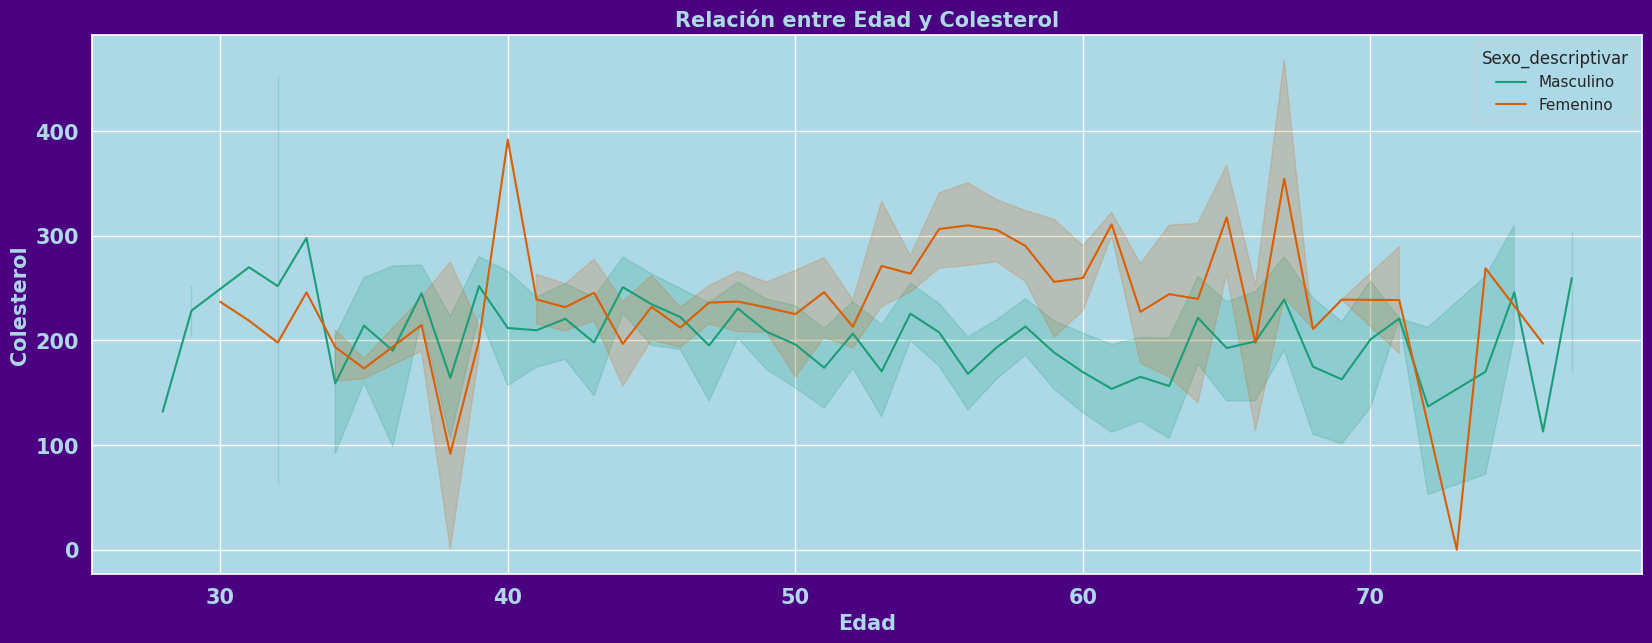

In [26]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
sns.lineplot(data=data2, x='Edad', y='Colesterol', hue='Sexo_descriptivar', palette='Dark2')
plt.title('Relación entre Edad y Colesterol', color='lightblue', size=15, weight='bold')
plt.xlabel('Edad', color='lightblue', size=15,weight='bold')
plt.ylabel('Colesterol', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
plt.show()

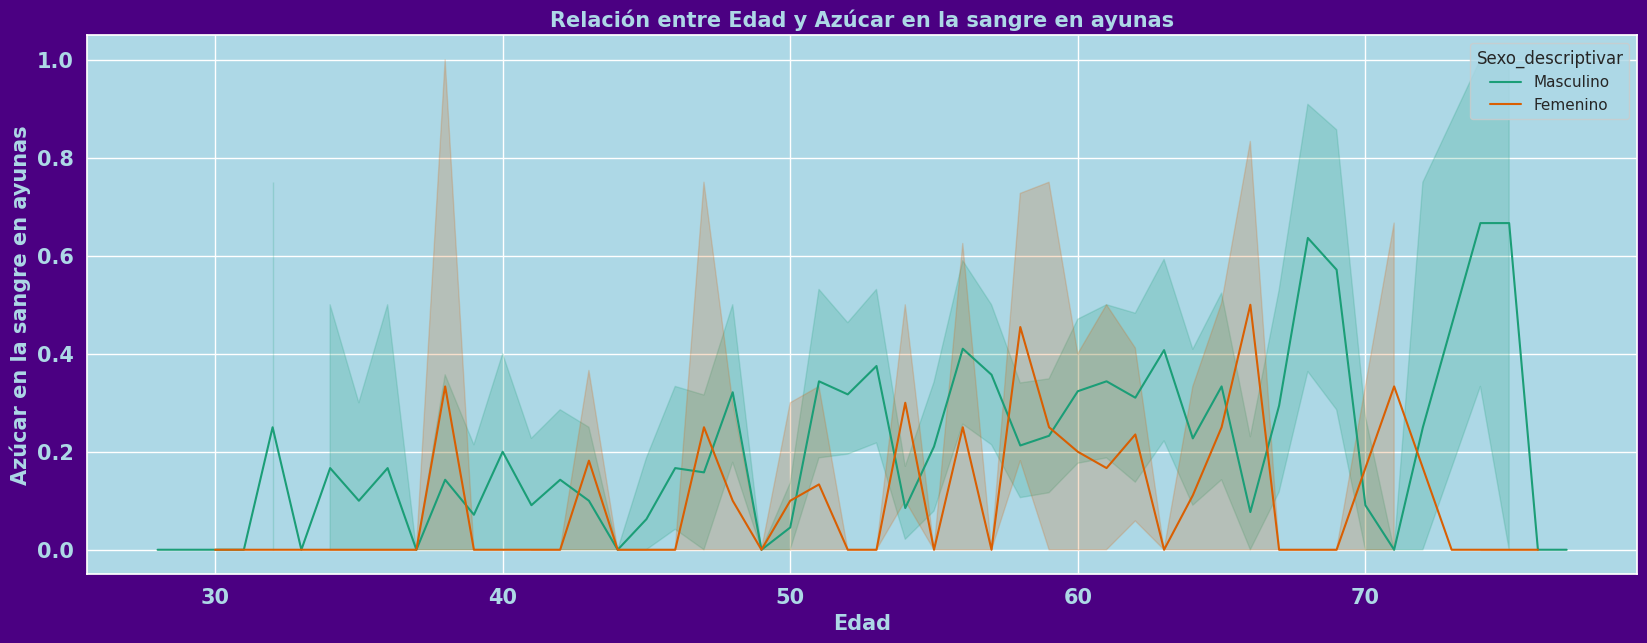

In [27]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
sns.lineplot(data=data2, x='Edad', y='Azúcar en la sangre en ayunas', hue='Sexo_descriptivar', palette='Dark2')
plt.title('Relación entre Edad y Azúcar en la sangre en ayunas', color='lightblue', size=15, weight='bold')
plt.xlabel('Edad', color='lightblue', size=15,weight='bold')
plt.ylabel('Azúcar en la sangre en ayunas', color='lightblue', size=15,weight='bold')
plt.xticks(color='lightblue', size=15,weight='bold')
plt.yticks(color='lightblue', size=15,weight='bold')
plt.show()

In [28]:
data2_correlacion = data2.drop(columns='Sexo_descriptivar', axis=1)
data2_correlacion.corr()

,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
Sexo,1.000000,0.015096,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
Edad,0.015096,1.000000,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
Tipo de dolor en el pecho,0.138405,0.149055,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
Presión arterial en reposo,-0.006443,0.257692,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
Colesterol,-0.208441,-0.046472,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
Azúcar en la sangre en ayunas,0.110961,0.178923,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
Electrocardiograma en reposo,-0.022225,0.194595,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
Frecuencia cardíaca máxima,-0.181837,-0.368676,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
Angina inducida por el ejercicio,0.194380,0.188095,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
Depresión del ST,0.096390,0.245093,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


In [30]:
data2_correlacion_sexo_edad_tipo_ddp = data2.loc[:,['Sexo','Edad','Tipo de dolor en el pecho']]
data2_correlacion_sexo_edad_tipo_ddp = data2_correlacion_sexo_edad_tipo_ddp.corr()
data2_correlacion_sexo_edad_tipo_ddp

,Sexo,Edad,Tipo de dolor en el pecho
Sexo,1.000000,0.015096,0.138405
Edad,0.015096,1.000000,0.149055
Tipo de dolor en el pecho,0.138405,0.149055,1.000000


In [31]:
data2_correlacion_sexo_edad_tipo_par = data2.loc[:,['Sexo','Edad','Presión arterial en reposo']]
data2_correlacion_sexo_edad_tipo_par = data2_correlacion_sexo_edad_tipo_par.corr()
data2_correlacion_sexo_edad_tipo_par

,Sexo,Edad,Presión arterial en reposo
Sexo,1.000000,0.015096,-0.006443
Edad,0.015096,1.000000,0.257692
Presión arterial en reposo,-0.006443,0.257692,1.000000


In [32]:
data2_correlacion_sexo_edad_tipo_col = data2.loc[:,['Sexo','Edad','Colesterol']]
data2_correlacion_sexo_edad_tipo_col = data2_correlacion_sexo_edad_tipo_col.corr()
data2_correlacion_sexo_edad_tipo_col

,Sexo,Edad,Colesterol
Sexo,1.000000,0.015096,-0.208441
Edad,0.015096,1.000000,-0.046472
Colesterol,-0.208441,-0.046472,1.000000


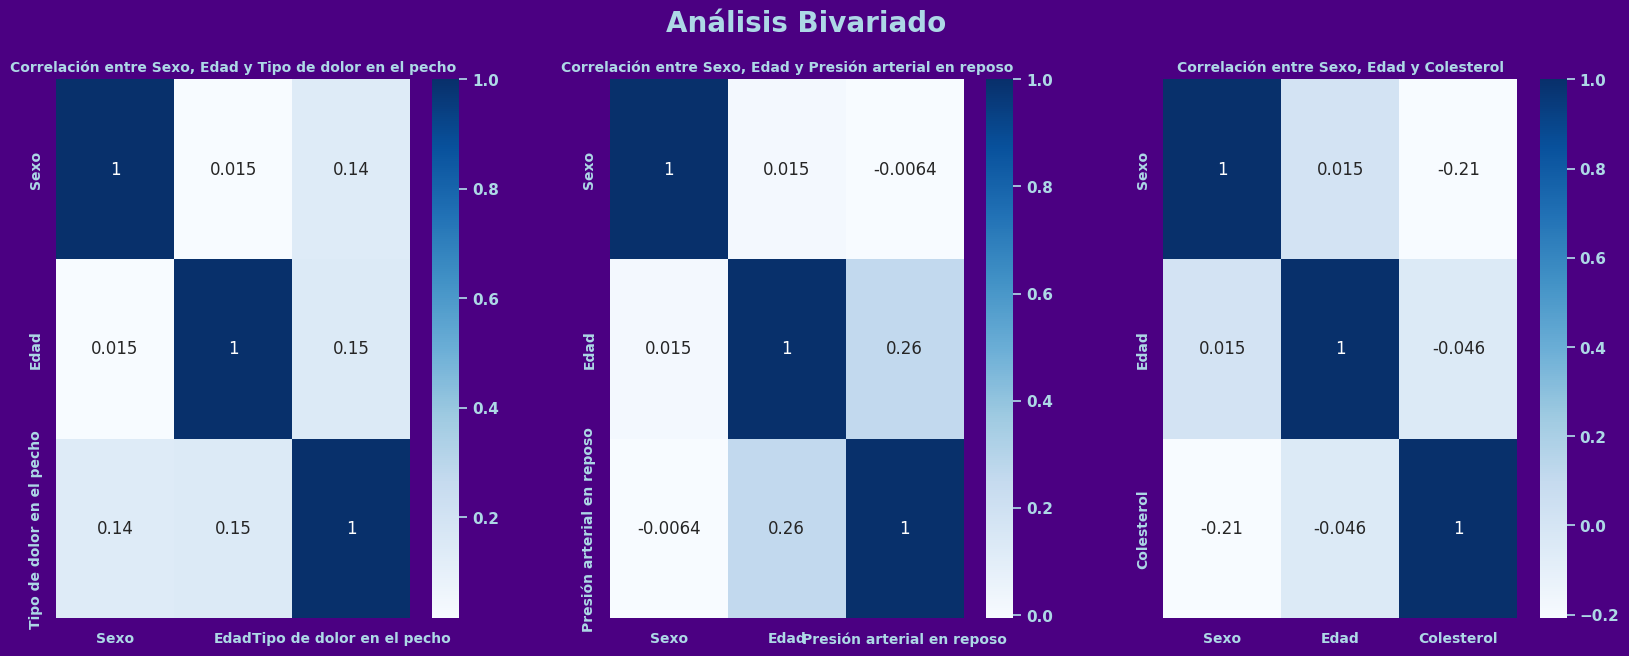

In [33]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Bivariado', color='lightblue', size=20, weight='bold')
plt.subplot(1,3,1)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_ddp, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Tipo de dolor en el pecho', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')
plt.subplot(1,3,2)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_par, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Presión arterial en reposo', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')
plt.subplot(1,3,3)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_col, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Colesterol', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [34]:
data2.sample()

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
707,Masculino,1,59,2,140,221,0,0,164,1,0.0,1,0


In [35]:
data2_correlacion_sexo_edad_tipo_azs = data2.loc[:,['Sexo','Edad','Azúcar en la sangre en ayunas']]
data2_correlacion_sexo_edad_tipo_azs = data2_correlacion_sexo_edad_tipo_azs.corr()
data2_correlacion_sexo_edad_tipo_azs

,Sexo,Edad,Azúcar en la sangre en ayunas
Sexo,1.000000,0.015096,0.110961
Edad,0.015096,1.000000,0.178923
Azúcar en la sangre en ayunas,0.110961,0.178923,1.000000


In [36]:
data2_correlacion_sexo_edad_tipo_ecr = data2.loc[:,['Sexo','Edad','Electrocardiograma en reposo']]
data2_correlacion_sexo_edad_tipo_ecr = data2_correlacion_sexo_edad_tipo_ecr.corr()
data2_correlacion_sexo_edad_tipo_ecr

,Sexo,Edad,Electrocardiograma en reposo
Sexo,1.000000,0.015096,-0.022225
Edad,0.015096,1.000000,0.194595
Electrocardiograma en reposo,-0.022225,0.194595,1.000000


In [37]:
data2_correlacion_sexo_edad_tipo_fcm = data2.loc[:,['Sexo','Edad','Frecuencia cardíaca máxima']]
data2_correlacion_sexo_edad_tipo_fcm = data2_correlacion_sexo_edad_tipo_fcm.corr()
data2_correlacion_sexo_edad_tipo_fcm

,Sexo,Edad,Frecuencia cardíaca máxima
Sexo,1.000000,0.015096,-0.181837
Edad,0.015096,1.000000,-0.368676
Frecuencia cardíaca máxima,-0.181837,-0.368676,1.000000


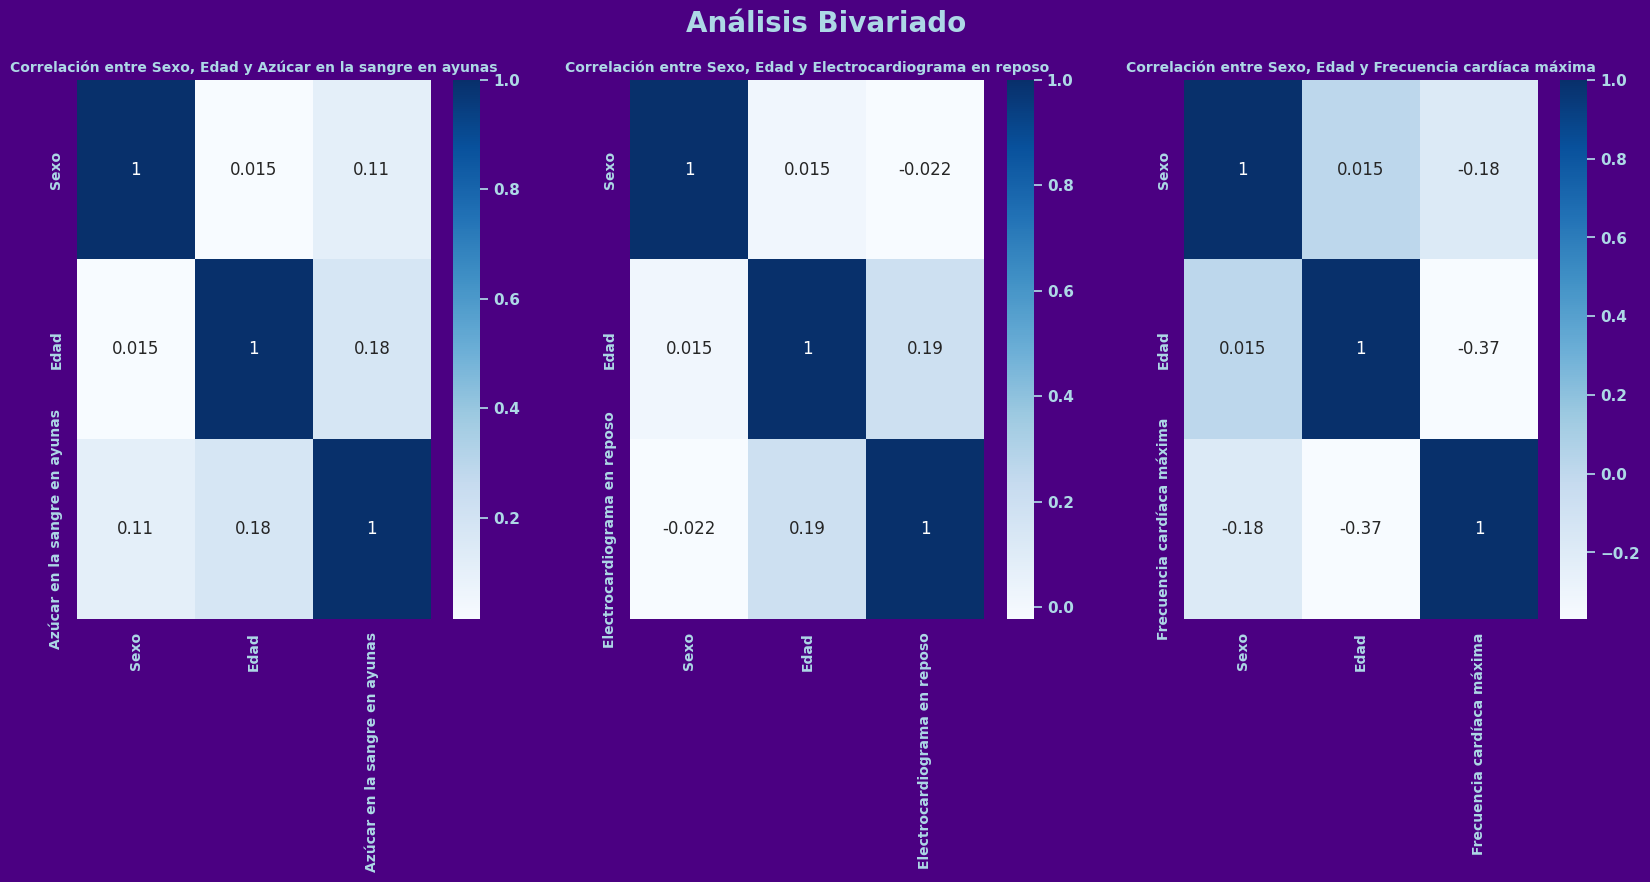

In [38]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Bivariado', color='lightblue', size=20, weight='bold')
plt.subplot(1,3,1)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_azs, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Azúcar en la sangre en ayunas', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')
plt.subplot(1,3,2)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_ecr, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Electrocardiograma en reposo', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')
plt.subplot(1,3,3)
heatmap = sns.heatmap(data2_correlacion_sexo_edad_tipo_fcm, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre Sexo, Edad y Frecuencia cardíaca máxima', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [39]:
data2.sample()

,Sexo_descriptivar,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST,Objetivo
222,Femenino,0,51,4,160,303,0,0,150,1,1.0,2,1


In [40]:
import scipy.stats as stats

In [41]:
hombres = data2[data['Sexo'] == 0].iloc[:,[3,4,5,6,7,8,9,10,11]]
mujeres = data2[data['Sexo'] == 1].iloc[:,[3,4,5,6,7,8,9,10,11]]

# Prueba t de muestras independientes para cada columna
for column in hombres.columns:
    t_statistic, p_value = stats.ttest_ind(hombres[column], mujeres[column])

    # Interpretando el resultado para cada columna
    if p_value < 0.05:
        print(f"La prueba t de muestras independientes 🔴-reveló una diferencia estadísticamente significativa en  {column} entre hombres y mujeres : p=({p_value})")
        print(' ')
    else:
        print(f"La prueba t de muestras independientes 🟢-no reveló una diferencia estadísticamente significativa en  {column} entre hombres y mujeres : p=( {p_value})")
        print(' ')

La prueba t de muestras independientes 🔴-reveló una diferencia estadísticamente significativa en  Tipo de dolor en el pecho entre hombres y mujeres : p=(1.6468510356263684e-06)
 
La prueba t de muestras independientes 🟢-no reveló una diferencia estadísticamente significativa en  Presión arterial en reposo entre hombres y mujeres : p=( 0.824296331886194)
 
La prueba t de muestras independientes 🔴-reveló una diferencia estadísticamente significativa en  Colesterol entre hombres y mujeres : p=(3.791099460535504e-13)
 
La prueba t de muestras independientes 🔴-reveló una diferencia estadísticamente significativa en  Azúcar en la sangre en ayunas entre hombres y mujeres : p=(0.00012526042354918659)
 
La prueba t de muestras independientes 🟢-no reveló una diferencia estadísticamente significativa en  Electrocardiograma en reposo entre hombres y mujeres : p=( 0.44369076225706594)
 
La prueba t de muestras independientes 🔴-reveló una diferencia estadísticamente significativa en  Frecuencia card

In [52]:
# Assuming you want to analyze the relationship between 'Sexo' and each of the 11 other columns individually:
import pandas as pd
from scipy.stats import chi2_contingency

for i in range(1, 12):  # Loop through columns 1 to 11
    tabla_contingencia = pd.crosstab(data2['Sexo'], data2.iloc[:, i])  # Use single column in crosstab
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    print(f"Results for column {data2.columns[i]}:")
    print("Estadístico chi-cuadrado:", chi2)
    print("Valor p:", p)
    print("Grados de libertad:", dof)
    print("Tabla de frecuencias esperadas:\n", expected)
    if p < 0.05:
        print("Se rechaza la hipótesis nula. Existe una relación significativa entre las variables.")
    else:
        print("No se rechaza la hipótesis nula. No hay evidencia de una relación significativa.")
    print("\n") # Add a newline for better readability

Results for column Sexo:
Estadístico chi-cuadrado: 1184.462450786291
Valor p: 1.452313334306417e-259
Grados de libertad: 1
Tabla de frecuencias esperadas:
 [[ 66.35378151 214.64621849]
 [214.64621849 694.35378151]]
Se rechaza la hipótesis nula. Existe una relación significativa entre las variables.


Results for column Edad:
Estadístico chi-cuadrado: 74.01578737815116
Valor p: 0.012003001256746625
Grados de libertad: 49
Tabla de frecuencias esperadas:
 [[ 0.23613445  0.94453782  0.23613445  0.47226891  1.18067227  0.47226891
   2.12521008  3.30588235  1.41680672  3.0697479   4.01428571  4.25042017
   3.77815126  7.79243697  6.1394958   7.32016807  6.84789916  5.90336134
   7.32016807  5.43109244  8.97310924  6.37563025  7.55630252 11.09831933
  11.09831933  9.44537815 15.8210084  11.09831933 11.09831933 11.80672269
  13.69579832 11.09831933 10.38991597  8.97310924 10.86218487  8.73697479
   7.32016807  6.84789916  4.48655462  5.43109244  3.0697479   3.77815126
   2.59747899  1.88907563

 - **Análisis Multivariado**: examino relaciones entre múltiples variables:
      - **Matrices de Correlación**: visualizo correlaciones entre variables numéricas usando `sns.heatmap(data.corr(), annot=True)`. Esto muestra la fuerza y la dirección de las relaciones lineales entre pares de variables.

In [63]:
data2_correlacion_all = data2.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]
data2_correlacion_all = data2_correlacion_all.corr()
data2_correlacion_all


,Sexo,Edad,Tipo de dolor en el pecho,Presión arterial en reposo,Colesterol,Azúcar en la sangre en ayunas,Electrocardiograma en reposo,Frecuencia cardíaca máxima,Angina inducida por el ejercicio,Depresión del ST,Pendiente del ST
Sexo,1.000000,0.015096,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913
Edad,0.015096,1.000000,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749
Tipo de dolor en el pecho,0.138405,0.149055,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949
Presión arterial en reposo,-0.006443,0.257692,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384
Colesterol,-0.208441,-0.046472,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053
Azúcar en la sangre en ayunas,0.110961,0.178923,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902
Electrocardiograma en reposo,-0.022225,0.194595,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629
Frecuencia cardíaca máxima,-0.181837,-0.368676,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750
Angina inducida por el ejercicio,0.194380,0.188095,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408
Depresión del ST,0.096390,0.245093,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639


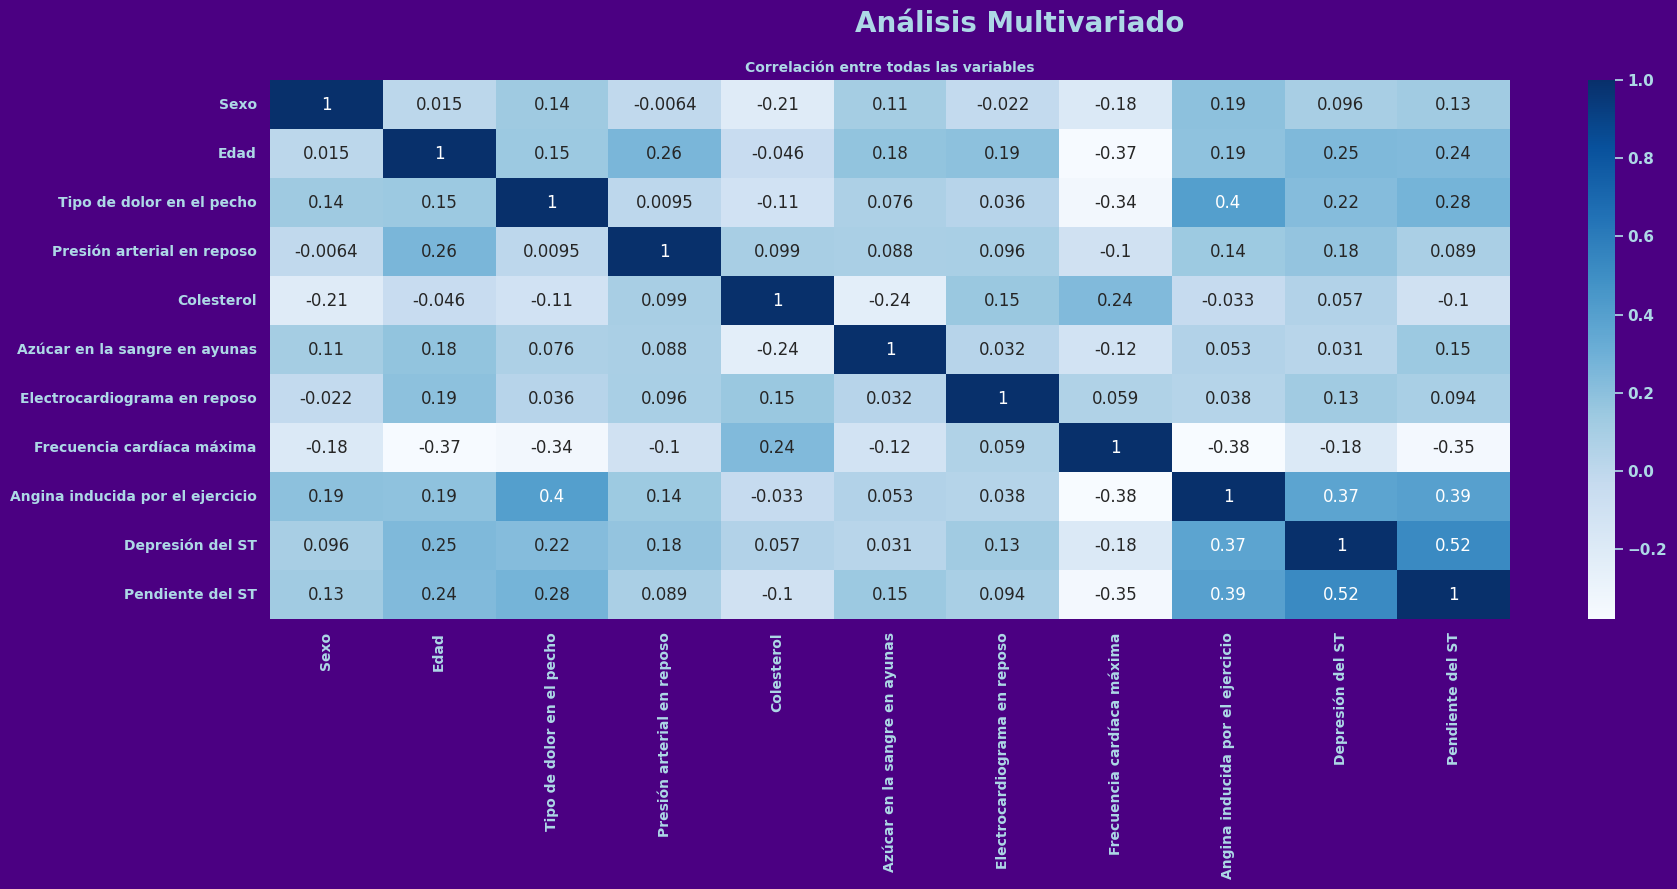

In [64]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,7))
plt.suptitle('Análisis Multivariado', color='lightblue', size=20, weight='bold')
heatmap = sns.heatmap(data2_correlacion_all, annot=True, cmap='Blues')
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(color='lightblue')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='lightblue', weight='bold')
plt.title('Correlación entre todas las variables', color='lightblue', size=10, weight='bold')
plt.xticks(color='lightblue', size=10,weight='bold')
plt.yticks(color='lightblue', size=10,weight='bold')
plt.show()

**7. Documentación:**

Documentaré cada paso del proceso de EDA, detallando decisiones como el tratamiento de valores faltantes y transformaciones aplicadas, lo que garantiza la reproducibilidad y facilita la comunicación de resultados.

Este enfoque me permitirá realizar un EDA completo y bien fundamentado del conjunto de datos.

## Informe del análisis de datos del DataFrame Cardiopatias

En el siguiente análisis de los datos del DataFrame, primero se **importaron las bibliotecas necesarias** para la manipulación, análisis y visualización de datos, incluyendo pandas, numpy, matplotlib y seaborn.

* Se descargó el conjunto de datos de enfermedades del corazón desde Kaggle utilizando la biblioteca kagglehub y se guardó como un archivo CSV llamado "heart_disease_dataset.csv".
* Los datos se cargaron en un DataFrame de pandas.
* Se tradujeron los nombres de las columnas al español para facilitar la comprensión.

Para la **inspección inicial de los datos**:

* Se utilizaron los métodos `head()`, `tail()`, `info()`, `describe()` y `shape` para obtener una visión general de los datos.
* `data.info()` mostró que no había valores faltantes en el conjunto de datos, por lo que no se requirieron pasos adicionales de limpieza de datos.
* Se creó una copia del DataFrame original (`data2`) para realizar modificaciones sin afectar los datos originales.
* Se agregó una nueva columna llamada "Sexo_descriptivar" para representar el sexo en formato legible ("Masculino" y "Femenino") en lugar de valores numéricos.

El **análisis exploratorio de datos (EDA)** se dividió en tres partes:

**1. Análisis Univariado:**

* Se visualizó la distribución de la edad y el colesterol por sexo utilizando histogramas.
* Se creó un subconjunto de datos (`data2_grupo_p_a_r`) que incluía solo a las personas con presión arterial en reposo entre 80 y 120.
* Se visualizó la distribución de la presión arterial en reposo y la frecuencia cardíaca máxima para este subconjunto.
* Se analizó la distribución del tipo de dolor en el pecho en función de la edad.

**2. Análisis Bivariado:**

* Se examinó la relación entre la edad y el colesterol, y entre la edad y el azúcar en la sangre en ayunas utilizando diagramas de dispersión y gráficos de líneas.
* Se calcularon las matrices de correlación para diferentes subconjuntos de variables para comprender las relaciones lineales entre ellas.
    * Se visualizaron estas matrices de correlación utilizando mapas de calor.
* Se realizaron pruebas t de muestras independientes para comparar las medias de diferentes variables entre hombres y mujeres.
    * Se encontró que existen diferencias estadísticamente significativas en varias variables, incluyendo el tipo de dolor en el pecho, el colesterol, el azúcar en la sangre en ayunas, la frecuencia cardíaca máxima, la angina inducida por el ejercicio, la depresión del ST y la pendiente del ST.

**3. Análisis Multivariado:**

* Se calculó y visualizó la matriz de correlación para todas las variables numéricas para obtener una visión general de las relaciones entre ellas.

Además, se realizaron pruebas de chi-cuadrado para evaluar la relación entre el sexo y cada una de las otras 11 variables. Los resultados indicaron una relación significativa entre el sexo y la mayoría de las variables, incluyendo la edad, el tipo de dolor en el pecho, la presión arterial en reposo, el colesterol, el azúcar en la sangre en ayunas, el electrocardiograma en reposo, la frecuencia cardíaca máxima, la angina inducida por el ejercicio, la depresión del ST y la pendiente del ST.
